## Analyzing the Stroop Effect


#### (1) What is the independent variable? What is the dependent variable?

The independent variable is whether or not the words displayed are congruent (e.g. <font color=red>Red</font>) or incongruent (e.g. <font color=blue>Red</font>). This is a categorical variable.

The dependent variable is the time it takes the subject to say out loud the color of the ink in which the word is printed, for both congruent and incongruent lists of words. This is a continuous variable.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The appropriate hypotheses are:
$$ H_{0}:\mu_{i} - \mu_{c} = 0$$
$$ H_{A}:\mu_{i} - \mu_{c}\neq 0$$
where $\mu_{c}$ is the population mean time taken to read the congruent list (in seconds) and $\mu_{i}$ is the population mean time taken to read the incongruent list (in seconds).

In other words, the null hypothesis states that the congruent and incongruent population means are equal. The alternative hypothesis is that the congruent and incongruent population means are different.

Because we are dealing with time measurements for the same subject under different conditions, it is appropriate to use a paired t-test to test our hypotheses. This test works under the following assumptions:
- Each of the two populations being compared follow a normal distribution
- The two populations have the same variance
- There should be no significant outliers in the differences between the two related groups.

In this case, I believe these assumptions are reasonable. However, I will also perform a test by bootstrapping the sample (which does not require the above assumptions) to confirm the results of the t-test. Ideally, we would want to have >30 pairs for the t-test, but 24 pairs should be close enough. If anything, having fewer pairs will affect the power of our test, but will not affect the interpretation if the test leads us to reject the null hypothesis. We do not have a population parameter for this test, we will be working with the sample statistics to compare the populations.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import libraries and load database
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Central tendency: The means for congruent and incongruent lists are 14.05 sec and 22.02 sec, respectively.
Variability: The standard deviations for congruent and incongruent lists are 3.56 sec and 4.80 sec, respectively.

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

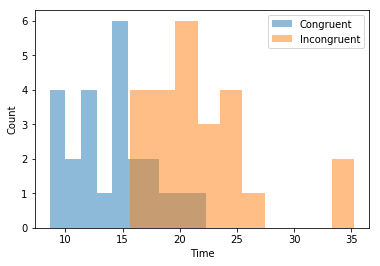

In [3]:
plt.hist(df['Congruent'], alpha=0.5)
plt.hist(df['Incongruent'], alpha=0.5)
plt.legend(['Congruent', 'Incongruent'])
plt.xlabel('Time')
plt.ylabel('Count');

The histograms above show that the times for the incongruent group tend to be higher than the ones for the congruent group, though there is some overlap. The mode for the congruent group seems to be 15 seconds, while the mode for the incongruent group is around 21 seconds. Of note, the sample data does not appear to be normally distributed, though it is hard to tell with a sample of only 24 subjects.

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [4]:
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

The paired t-test performed above is evaluating the null hypothesis that the means of both samples are the same. The p-value, which corresponds to the probability of observing a difference in means as extreme as the one we see if the null hypothesis were true, is $4.1\times10^{-8}$. Essentially, that means that the Type I error associated with the test is $4.1\times10^{-8}$. If we use $\alpha=0.05$, the p-value we obtained leads us to reject the null hypothesis. Therefore, we can conclude that there likely is a difference between the means, and that subjects reading the incongruent list take longer, on average, than when they are reading the congruent list.

Another way to test our hypothesis would be to bootstrap a sample and compare that to what the difference in means would be under the null hypothesis:

In [5]:
diffs = []
for _ in range(10000):
    sample = df.sample(len(df), replace=True)
    cong = sample['Congruent'].mean()
    incong = sample['Incongruent'].mean()
    diffs.append(incong - cong)
diffs = np.array(diffs)

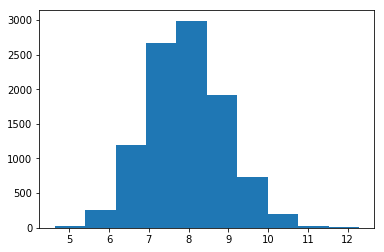

In [6]:
plt.hist(diffs);

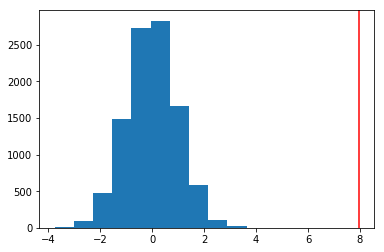

In [7]:
obs_diff = df['Incongruent'].mean() - df['Congruent'].mean()
null_values = np.random.normal(0, np.std(diffs), 10000)
plt.hist(null_values)
plt.axvline(obs_diff, c='red');

In [8]:
p_val = (null_values > obs_diff).mean()
p_val

0.0

As we can see above, using this method yields similar results to our t-test. As we can see in the histogram directly above, our observed difference (red line) would be very unlikely if the null hypothesis were true. 

#### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There are several theories for why the Stroop effect happens in humans$^{1}$. Briefly, these are some of the most common ones used:
1. Processing speed
2. Selective attention
3. Automaticity
4. Parallel distributed processing

The processing speed theory states that "there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors". Therefore, when asked to say out loud the color of the word (as opposed to what the word says), the word information arrives at the decision-making stage before the color information, which leads to confusion. A similar test could be set up to investigate the validity of this theory. It would be similar to a Stroop test, but instead of saying the color of the word, the subject would be asked to read out what the word says. If the processing speed theory is correct, we would expect to see similar reaction times for both congruent and incongruent lists.

### References

1. [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect#Theories)